# Price House Prediction

-This is a project wich consists of predicting the price of houses in Seatle region.

-Second objective is to understand the main factors responsible for higher property value.

   In this notebook it will be applied a model for the prediction of the price of the houses.
A part of recognition in the data will be done using MySql in order to get more familiarized with the dataset.

   Several plots were also constructed in Tableau, the following links contain a dashboard and the most important map that along with the others will explain in a clear visual way why what motivates a higher property value.

   Link to the price per location graph (one mentioned above that reveals location is the more important factor for price): https://public.tableau.com/app/profile/francisco.duarte6075/viz/ZipcodeAVGPrice_16443360047910/ZipcodeAVGPrice?publish=yes
   
   Link to the average price per SQft:
https://public.tableau.com/app/profile/francisco.duarte6075/viz/AVGPricevsSQFT_16443363053140/Dashboard1?publish=yes

   Link to the dashboard detailing the many datapoints compared with the house average price:
https://public.tableau.com/app/profile/francisco.duarte6075/viz/Pricevs_16443368370360/Dashboard1?publish=yes


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn import preprocessing #for the encoding
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the data from the exel file.
data = pd.read_excel("./files_for_lab/regression_data.xls")

In [3]:
#Display all horizontal columns and visualization of the data we are working with.
pd.options.display.max_columns = None
data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [4]:
#Checking the types of data we are working with in each columns (numericals and categoricals)
data.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [5]:
#Checking if there are any nah values in the database.
data.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [6]:
#Checking uniques in columns with less than 100 unique values.
def check_unique_values(x):
    for col in x.columns:
        if x[col].nunique() < 100:
            print(col, x[col].unique())

check_unique_values(data)

bedrooms [ 3  2  4  5  1  6  7  8  9 11 10 33]
bathrooms [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75 6.25
 6.5 ]
floors [1.  2.  1.5 3.  2.5 3.5]
waterfront [0 1]
view [0 3 4 2 1]
condition [3 5 4 1 2]
grade [ 7  6  8 11  9  5 10 12  4  3 13]
yr_renovated [   0 1991 2002 2010 1999 1992 2013 1994 1978 2005 2008 2003 1984 1954
 2014 2011 1974 1983 1945 1990 1988 1957 1977 1981 1995 2000 1998 1970
 1989 2004 1986 2009 2007 1987 1973 2006 1985 2001 1980 1971 1979 1997
 1950 1969 1948 2015 1968 2012 1963 1951 1993 1962 1996 1972 1953 1955
 1982 1956 1940 1976 1946 1975 1958 1964 1959 1960 1967 1965 1934 1944]
zipcode [98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 9

In [7]:
#Describing the data so we can have a better understanding of where the averages are at and where the
#limit values lie at.
data.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [8]:
#Creating a function that divides the data into categorical and numerical, and subdivides the numerical in
#continous and discrete, the filter used for this was 10000 which is almost 50% of the dataframe rows.

def continuous_discrete(x):
    discrete = []
    continuous = []
    categorical = x.select_dtypes(include = np.object)
    numerical = x.select_dtypes(include = np.number)
    for col in numerical.columns:
        if numerical[col].nunique() > 10000:
            continuous.append(col)
        else:
            discrete.append(col)
    return x[discrete],x[continuous],categorical

discrete,continuous,categorical = continuous_discrete(data)

In [9]:
discrete

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [10]:
continuous

,id
0,7129300520
1,6414100192
2,5631500400
3,2487200875
4,1954400510
...,...
21592,263000018
21593,6600060120
21594,1523300141
21595,291310100


In [11]:
categorical

""
0
1
2
3
4
...
21592
21593
21594
21595


In [12]:
#Double checking the count of total unique values per column in order to better understand some data points
for col in data.columns:
    if data[col].nunique():
        print(col, data[col].nunique())

id 21420
date 372
bedrooms 12
bathrooms 29
sqft_living 1034
sqft_lot 9776
floors 6
waterfront 2
view 5
condition 5
grade 11
sqft_above 942
sqft_basement 306
yr_built 116
yr_renovated 70
zipcode 70
lat 5033
long 751
sqft_living15 777
sqft_lot15 8682
price 3622


In [13]:
#Checking how many id's are repeated since the total uniques is less than the total rows in the dataframe
data.loc[data.id.duplicated(),:]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
94,6021501535,2014-12-23,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,700000
314,4139480200,2014-12-09,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1400000
325,7520000520,2015-03-11,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460,240500
346,3969300030,2014-12-29,4,1.00,1000,7134,1.0,0,0,3,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138,239900
372,2231500030,2015-03-24,4,2.25,2180,10754,1.0,0,0,5,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929,530000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2015-02-19,4,3.50,2910,5260,2.0,0,0,3,9,2910,0,2012,0,98065,47.5168,-121.883,2910,5260,645000
20597,2724049222,2014-12-01,2,2.50,1000,1092,2.0,0,0,3,7,990,10,2004,0,98118,47.5419,-122.271,1330,1466,220000
20654,8564860270,2015-03-30,4,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992,502000
20764,6300000226,2015-05-04,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,380000


In [14]:
#Visualising the difference between the same id- date and price are not equal, so in order to preserve the
#data and use the id as an id we will need to make some changes to it.
data.loc[data['id'] == 8564860270]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
20653,8564860270,2014-07-08,4,2.5,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992,449990
20654,8564860270,2015-03-30,4,2.5,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992,502000


In [15]:
#extract year from the date column
data['year_sold'] = data['date'].dt.year

In [16]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year_sold
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,2014
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,2014
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,2015
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,2014
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,2015


In [18]:
#Subtract the year sold with the renovated year on a new column
data["year_diff"] = data['year_sold'] - data['yr_renovated']

data["year_diff"] = np.where(data["year_diff"]>2000,data["year_sold"]-data["yr_built"],data["year_diff"])

data["year_diff"]

0        59
1        23
2        82
3        49
4        28
         ..
21592     5
21593     1
21594     5
21595    11
21596     6
Name: year_diff, Length: 21597, dtype: int64

In [19]:
#Encoding the zipcode columns.
le = preprocessing.LabelEncoder()
data['zipcode'] = le.fit_transform(data['zipcode'])
data['zipcode']

0        66
1        55
2        16
3        58
4        37
         ..
21592    42
21593    60
21594    59
21595    15
21596    59
Name: zipcode, Length: 21597, dtype: int64

In [20]:
#Creating an id
data.set_index('id')

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year_sold,year_diff
id,,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,66,47.5112,-122.257,1340,5650,221900,2014,59
6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,55,47.7210,-122.319,1690,7639,538000,2014,23
5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,16,47.7379,-122.233,2720,8062,180000,2015,82
2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,58,47.5208,-122.393,1360,5000,604000,2014,49
1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,37,47.6168,-122.045,1800,7503,510000,2015,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,42,47.6993,-122.346,1530,1509,360000,2014,5
6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,60,47.5107,-122.362,1830,7200,400000,2015,1
1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,59,47.5944,-122.299,1020,2007,402101,2014,5


In [21]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year_sold,year_diff
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,66,47.5112,-122.257,1340,5650,221900,2014,59
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,55,47.7210,-122.319,1690,7639,538000,2014,23
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,16,47.7379,-122.233,2720,8062,180000,2015,82
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,58,47.5208,-122.393,1360,5000,604000,2014,49
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,37,47.6168,-122.045,1800,7503,510000,2015,28


In [22]:
"""Droping the columns that will not be used for sure. Like lat and long since they are coordinates and do
not offer any relevant detail to be analysed since we already have the zipcode which is a much better
indicator of the location the houses are in"""

data = data.drop(["lat","long","date","yr_renovated","year_sold"], axis=1)

In [23]:
"""Removing outliers - this was opted as not the best

def remove_outliers(data, threshold=1.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
            print (column,data)
    return data"""

'#Removing outliers\n\ndef remove_outliers(data, threshold=1.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):\n    for column in in_columns:\n        if column not in skip_columns:\n            upper = np.percentile(data[column],75)\n            lower = np.percentile(data[column],25)\n            iqr = upper - lower\n            upper_limit = upper + threshold * iqr\n            lower_limit = lower - threshold * iqr\n            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]\n            print (column,data)\n    return data'

In [24]:
""" aplying the removing outliers function
datatest1 = data.copy()

datatest1 = remove_outliers(datatest1, threshold=2, skip_columns=["waterfront","view","yr_renovated","year_diff"])

datatest1"""

'datatest1 = data.copy()\n\ndatatest1 = remove_outliers(datatest1, threshold=2, skip_columns=["waterfront","view","yr_renovated","year_diff"])\n\ndatatest1'

In [43]:
#removing outliers low and high from target variable
q_low = data["price"].quantile(0.03)
q_hi  = data["price"].quantile(0.97)

data = data[(data["price"] < q_hi) & (data["price"] > q_low)]

In [44]:
data["price"].describe()

count     17920.000000
mean     484883.504632
std      173305.106049
min      235750.000000
25%      340701.000000
50%      450000.000000
75%      600000.000000
max      930800.000000
Name: price, dtype: float64

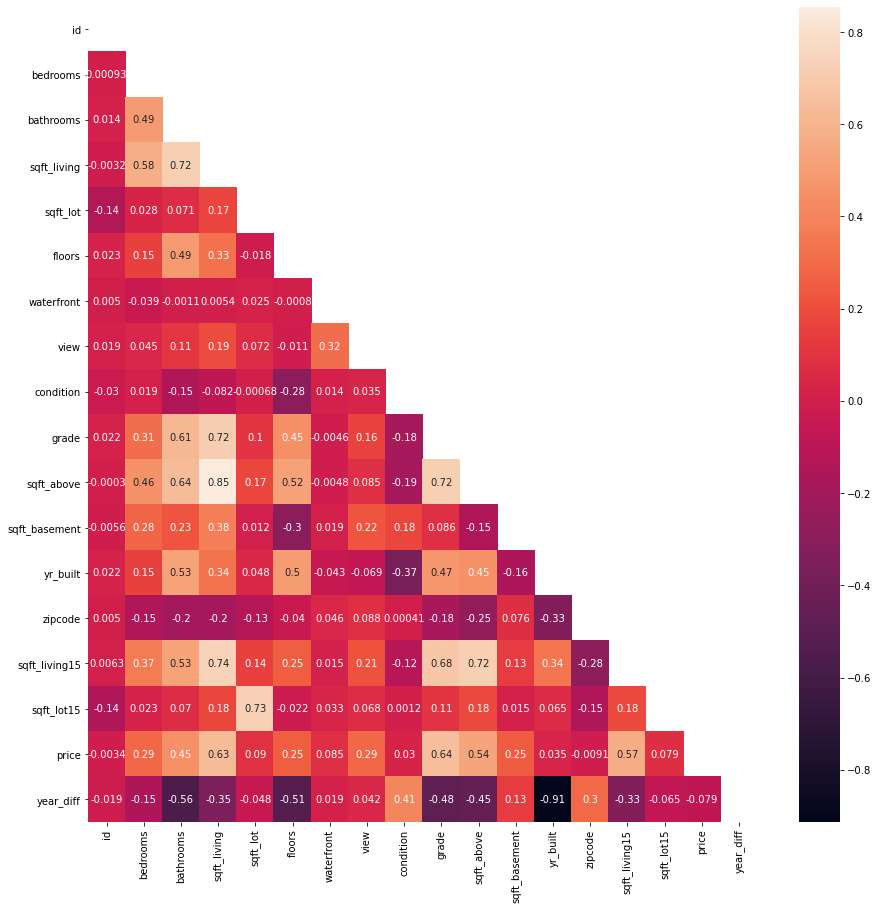

In [27]:
#checking the correlations in the data
data.corr()
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

In [28]:
#dummies = pd.get_dummies(data[['zipcode']], drop_first=True)
data = pd.get_dummies(data, columns=['zipcode'])

#dummies

In [29]:
"""USEFULL STUFF
yr_renovated - year sold // to make different column so it has another good point of information
deal with outliers or chunks of data that is barely present in the dataframe.
price outlier
"""

'USEFULL STUFF\nyr_renovated - year sold // to make different column so it has another good point of information\ndeal with outliers or chunks of data that is barely present in the dataframe.\nprice outlier\n'

In [30]:
#Training part

In [45]:
# splitting our data

X = data.drop('price', axis=1)
y = data['price']

# using different columns to train and test to get more accurate results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
predictions = model.predict(X_test)

In [48]:
#Results of the test.
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.7931297974809701, 57874.50900438936, 77592.58496327144)

In [49]:
#Mean Absolute Error && Mean Squared Error
mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(57874.50900438936, 77592.58496327144)

In [50]:
import math

results = pd.DataFrame()
results['true'] = y_test
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,resid
15102,430000,453218.696451,23218.696451
14370,285000,248638.373943,36361.626057
10853,310000,332802.579788,22802.579788
8861,370000,428613.289622,58613.289622
8558,270000,247545.730275,22454.269725
...,...,...,...
19164,475000,552634.932808,77634.932808
18486,475000,514912.627554,39912.627554
17339,919000,897372.052058,21627.947942
18230,464000,353779.818305,110220.181695


In [51]:
results.sort_values('resid', ascending=False)

,true,pred,resid
14821,300523,758592.135527,458069.135527
326,274975,695880.125241,420905.125241
12634,890000,491066.565856,398933.434144
9554,650000,252101.348249,397898.651751
3568,770000,384217.954595,385782.045405
...,...,...,...
15269,607500,607422.000850,77.999150
9050,354950,354981.848151,31.848151
1932,320000,319980.171611,19.828389
5599,270000,269990.451955,9.548045


In [52]:
results[results['true'] >= 40]

,true,pred,resid
15102,430000,453218.696451,23218.696451
14370,285000,248638.373943,36361.626057
10853,310000,332802.579788,22802.579788
8861,370000,428613.289622,58613.289622
8558,270000,247545.730275,22454.269725
...,...,...,...
19164,475000,552634.932808,77634.932808
18486,475000,514912.627554,39912.627554
17339,919000,897372.052058,21627.947942
18230,464000,353779.818305,110220.181695


In [53]:
results.describe()

,true,pred,resid
count,5376.000000,5.376000e+03,5376.000000
mean,482079.085193,4.841737e+05,57874.509004
std,170612.814120,1.527341e+05,51687.981263
min,235750.000000,1.003965e+05,8.242989
25%,340375.000000,3.669887e+05,19493.767175
50%,450000.000000,4.782259e+05,44226.440437
75%,595000.000000,5.881370e+05,81158.290057
max,930000.000000,1.130704e+06,458069.135527


<AxesSubplot:xlabel='true', ylabel='pred'>

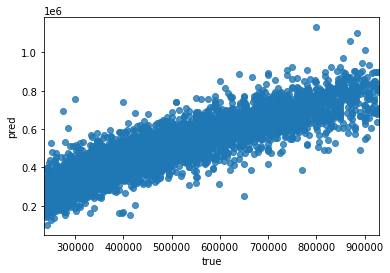

In [54]:
#Plot to better visualize the line and the cases
sns.regplot(results['true'], results['pred'])

Conclusions on this prediction model:
-This model is not the best at predicting the price of a very cheap or expensive house but does predict well for mid priced houses which contain the majoriry of the houses available.
-The model had an R2 score of 79% or 0.79.
-The model could maybe be improved be aplying other tests but still had a decent score with linear regression.
-Previous alterations can be tweaked in order to search for other important factors the user of this would deem fit.